In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
url = "cs-training.csv"
data = pd.read_csv(url)
data = data.sample(frac = 1)
data = data.drop(data.iloc[:, 0:1],axis = 1)
trainingdata = imp_mean.fit_transform(data)
X_data_train = trainingdata[:,1:len(trainingdata)]
Y_data_train = trainingdata[:,0]
x_train, x_validate, y_train, y_validate = train_test_split(X_data_train, Y_data_train, test_size=0.30, random_state = 0)

In [3]:
urltest = "cs-test.csv"
testingdata = pd.read_csv(urltest)
testingdata = testingdata.drop(testingdata.iloc[:, 0:1],axis = 1)
X_test = imp_mean.fit_transform(testingdata)

In [4]:
url3 = "sampleEntry.csv"
data = pd.read_csv(url3)
data = data.drop(data.iloc[:, 0:1],axis = 1).values
d= np.mean(data, dtype=np.float64)
y_test = []
for i in data:
  if(i > 0.5):
    y_test.append(1)
  else:
    y_test.append(0)

Accuracy Score For Train (max depth = 4) : 0.9364285714285714
Precision Score For Train (max depth = 4) : 0.9364285714285714
Recall Score For Train (max depth = 4) : 0.9364285714285714
Accuracy Score For Validate (max depth = 4) : 0.9351777777777778
Precision Score For Validate (max depth = 4) : 0.9351777777777778
Recall Score For Validate (max depth = 4) : 0.9351777777777778
Accuracy Score For Test (max depth = 4) : 0.9905027437612681
Precision Score For Test (max depth = 4) : 0.9905027437612681
Recall Score For Test (max depth = 4) : 0.9905027437612681

Accuracy Score For Train (max depth = 6) : 0.9382571428571429
Precision Score For Train (max depth = 6) : 0.9382571428571429
Recall Score For Train (max depth = 6) : 0.9382571428571429
Accuracy Score For Validate (max depth = 6) : 0.9361111111111111
Precision Score For Validate (max depth = 6) : 0.9361111111111111
Recall Score For Validate (max depth = 6) : 0.9361111111111111
Accuracy Score For Test (max depth = 6) : 0.993744027270129

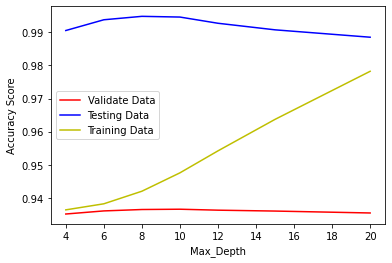

In [5]:
arr = [4,6,8,10,12,15,20]
train_plot = []
test_plot = []
validate_plot = []
for i in arr:
  model = RandomForestClassifier(max_depth=i, random_state=0)
  model.fit(x_train,y_train)
  pred_train = model.predict(x_train)
  pred_test = model.predict(X_test)
  pred_validate = model.predict(x_validate)
  accuracy_score_train = accuracy_score(y_train,pred_train)
  recall_score_train = recall_score(y_train,pred_train,average = "micro")
  precision_score_train = precision_score(y_train,pred_train,average = "micro")
  accuracy_score_validate = accuracy_score(y_validate,pred_validate)
  recall_score_validate = recall_score(y_validate,pred_validate,average = "micro")
  precision_score_validate = precision_score(y_validate,pred_validate,average = "micro")
  accuracy_score_test = accuracy_score(y_test,pred_test)
  recall_score_test = recall_score(y_test,pred_test,average = "micro")
  precision_score_test = precision_score(y_test,pred_test,average = "micro")
  validate_plot.append(accuracy_score_validate)
  test_plot.append(accuracy_score_test)
  train_plot.append(accuracy_score_train)
  print("Accuracy Score For Train (max depth = " + str(i) + ") : " + str(accuracy_score_train))
  print("Precision Score For Train (max depth = " + str(i) + ") : " + str(precision_score_train))
  print("Recall Score For Train (max depth = " + str(i) + ") : " + str(recall_score_train))
  print("Accuracy Score For Validate (max depth = " + str(i) + ") : " + str(accuracy_score_validate))
  print("Precision Score For Validate (max depth = " + str(i) + ") : " + str(precision_score_validate))
  print("Recall Score For Validate (max depth = " + str(i) + ") : " + str(recall_score_validate))
  print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
  print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
  print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
  print()
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy Score")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.plot(arr,train_plot,'y',label = "Training Data")
plt.legend()

Accuracy Score For Train (max depth = 8) : 0.942047619047619
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     98011
         1.0       0.76      0.19      0.30      6989

    accuracy                           0.94    105000
   macro avg       0.85      0.59      0.63    105000
weighted avg       0.93      0.94      0.93    105000



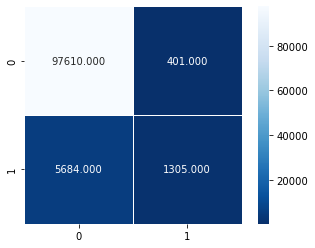

In [6]:
model = RandomForestClassifier(max_depth=8, random_state=0)
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
accuracy_score_train = accuracy_score(y_train,pred_train)
print("Accuracy Score For Train (max depth = " + str(8) + ") : " + str(accuracy_score_train))
print(classification_report(y_train,pred_train))
cm = confusion_matrix(y_train,pred_train)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score For Validate (max depth = 8) : 0.9365333333333333
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     41963
         1.0       0.63      0.15      0.24      3037

    accuracy                           0.94     45000
   macro avg       0.78      0.57      0.60     45000
weighted avg       0.92      0.94      0.92     45000



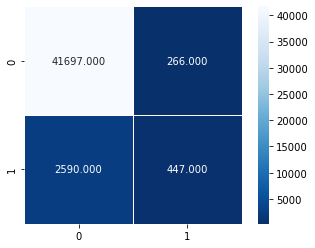

In [7]:
pred_validate = model.predict(x_validate)
accuracy_score_validate = accuracy_score(y_validate,pred_validate)
print("Accuracy Score For Validate (max depth = " + str(8) + ") : " + str(accuracy_score_validate))
print(classification_report(y_validate,pred_validate))
cm = confusion_matrix(y_validate,pred_validate)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score For Testing (max depth = 8) : 0.9947784794538093
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99798
           1       0.88      0.80      0.84      1705

    accuracy                           0.99    101503
   macro avg       0.94      0.90      0.92    101503
weighted avg       0.99      0.99      0.99    101503



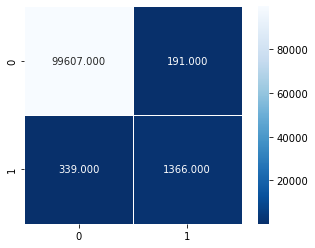

In [8]:
pred_test = model.predict(X_test)
accuracy_score_test = accuracy_score(y_test,pred_test)
print("Accuracy Score For Testing (max depth = " + str(8) + ") : " + str(accuracy_score_test))
print(classification_report(y_test,pred_test))
cm = confusion_matrix(y_test,pred_test)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

In [9]:
model.feature_importances_

array([0.19918341, 0.04164184, 0.12355355, 0.03828704, 0.03135562,
       0.0272002 , 0.34718885, 0.01396838, 0.16760932, 0.0100118 ])

<BarContainer object of 10 artists>

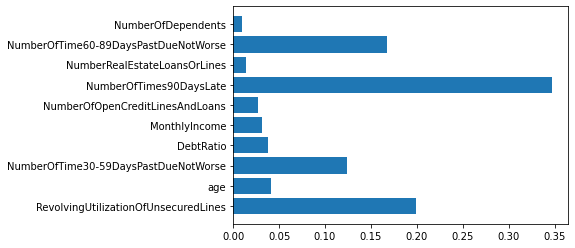

In [10]:
arr = ["RevolvingUtilizationOfUnsecuredLines","age","NumberOfTime30-59DaysPastDueNotWorse","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]
plt.barh(arr,model.feature_importances_)

Accuracy Score For Test (max depth = 1) : 0.98320246692216
Precision Score For Test (max depth = 1) : 0.98320246692216
Recall Score For Test (max depth = 1) : 0.98320246692216

Accuracy Score For Test (max depth = 2) : 0.98320246692216
Precision Score For Test (max depth = 2) : 0.98320246692216
Recall Score For Test (max depth = 2) : 0.98320246692216

Accuracy Score For Test (max depth = 3) : 0.98320246692216
Precision Score For Test (max depth = 3) : 0.98320246692216
Recall Score For Test (max depth = 3) : 0.98320246692216

Accuracy Score For Test (max depth = 4) : 0.9830349841876594
Precision Score For Test (max depth = 4) : 0.9830349841876594
Recall Score For Test (max depth = 4) : 0.9830349841876594

Accuracy Score For Test (max depth = 5) : 0.9889855472252052
Precision Score For Test (max depth = 5) : 0.9889855472252052
Recall Score For Test (max depth = 5) : 0.9889855472252052

Accuracy Score For Test (max depth = 6) : 0.9867393081977872
Precision Score For Test (max depth = 6) :

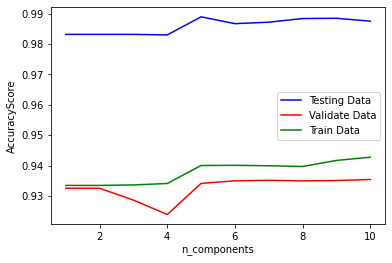

In [13]:
arr = [1,2,3,4,5,6,7,8,9,10]
test_plot = []
validate_plot = []
train_plot = []
for i in arr:
    clf = PCA(n_components = i)
    X_train2 = clf.fit_transform(x_train)
    X_valid2 = clf.fit_transform(x_validate)
    X_test2 = clf.fit_transform(X_test)
    clf = RandomForestClassifier(max_depth=8, random_state=0)
    clf.fit(X_train2, y_train)
    pred_test = clf.predict(X_test2)
    pred_val = clf.predict(X_valid2)
    pred_train = clf.predict(X_train2)
    score = clf.score(X_test2, y_test)
    accuracy_score_test = accuracy_score(y_test,pred_test)
    recall_score_test = recall_score(y_test,pred_test,average = "micro")
    precision_score_test = precision_score(y_test,pred_test,average = "micro")
    test_plot.append(accuracy_score_test)

    recall_score_validate = recall_score(y_validate, pred_val, average = "micro")
    precision_score_validate = precision_score(y_validate, pred_val, average = "micro")
    accuracy_score_validate = accuracy_score(y_validate, pred_val)
    validate_plot.append(accuracy_score_validate)

    recall_score_train = recall_score(y_train, pred_train, average = "micro")
    precision_score_train = precision_score(y_train, pred_train, average = "micro")
    accuracy_score_train = accuracy_score(y_train, pred_train)
    train_plot.append(accuracy_score_train)
    print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
    print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
    print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
    print()
plt.xlabel("n_components")
plt.ylabel("AccuracyScore")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,train_plot,'g',label = "Train Data")
plt.legend()
